<a href="https://colab.research.google.com/github/arahmanmdmajid/DS_AI_11/blob/main/Machine_Learning_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Multilinear Regression &amp; Polynomial Regression

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##Data Preprocessing

In [187]:
#Load the dataset.
df = pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/Machine Learning/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [188]:
#Handle missing values (if any).
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [189]:
#Encode categorical variables using one-hot encoding or label encoding.
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [190]:
for col in df.columns:
  # print(f'{col}: {df[col].unique()}')
  print(f'{col} unique values: {df[col].value_counts()}')

gender unique values: gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity unique values: race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education unique values: parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch unique values: lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course unique values: test preparation course
none         642
completed    358
Name: count, dtype: int64
math score unique values: math score
65    36
62    35
69    32
59    32
73    27
      ..
24     1
26     1
19     1
23     1
8      1
Name: count, Length: 81, dtype: int64
reading score unique values: reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
26     1
28     1
23  

In [191]:
df.loc[df['parental level of education'] == 'some college', 'parental level of education'] = 'college'
df.loc[df['parental level of education'] == 'some high school', 'parental level of education'] = 'high school'

In [192]:
for col in df.columns:
  # print(f'{col}: {df[col].unique()}')
  print(f'{col} unique values: {df[col].value_counts()}')

gender unique values: gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity unique values: race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education unique values: parental level of education
high school           375
college               226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch unique values: lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course unique values: test preparation course
none         642
completed    358
Name: count, dtype: int64
math score unique values: math score
65    36
62    35
69    32
59    32
73    27
      ..
24     1
26     1
19     1
23     1
8      1
Name: count, Length: 81, dtype: int64
reading score unique values: reading score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
26     1
28     1
23     1
40     1
Name: count,

In [193]:
#using Orinal encoder to encode parent education
categories = [['high school', 'associate\'s degree', 'college', 'bachelor\'s degree', 'master\'s degree']]
encoder = OrdinalEncoder(categories=categories)
df['parental level of education'] = encoder.fit_transform(df[['parental level of education']])
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,3.0,standard,none,72,72,74
1,female,group C,2.0,standard,completed,69,90,88
2,female,group B,4.0,standard,none,90,95,93
3,male,group A,1.0,free/reduced,none,47,57,44
4,male,group C,2.0,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,4.0,standard,completed,88,99,95
996,male,group C,0.0,free/reduced,none,62,55,55
997,female,group C,0.0,free/reduced,completed,59,71,65
998,female,group D,2.0,standard,completed,68,78,77


In [194]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [195]:
categorical_columns = ['gender', 'race/ethnicity', 'lunch', 'test preparation course']

In [196]:
#encoding categorical columns using one hot encoder
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded.head()

,parental level of education,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,3.0,72,72,74,True,False,False,True,False,False,False,False,True,False,True
1,2.0,69,90,88,True,False,False,False,True,False,False,False,True,True,False
2,4.0,90,95,93,True,False,False,True,False,False,False,False,True,False,True
3,1.0,47,57,44,False,True,True,False,False,False,False,True,False,False,True
4,2.0,76,78,75,False,True,False,False,True,False,False,False,True,False,True


##Feature Engineering

In [197]:
#Choose relevant features to predict math score.
df_encoded.columns

Index(['parental level of education', 'math score', 'reading score',
       'writing score', 'gender_female', 'gender_male',
       'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E', 'lunch_free/reduced', 'lunch_standard',
       'test preparation course_completed', 'test preparation course_none'],
      dtype='object')

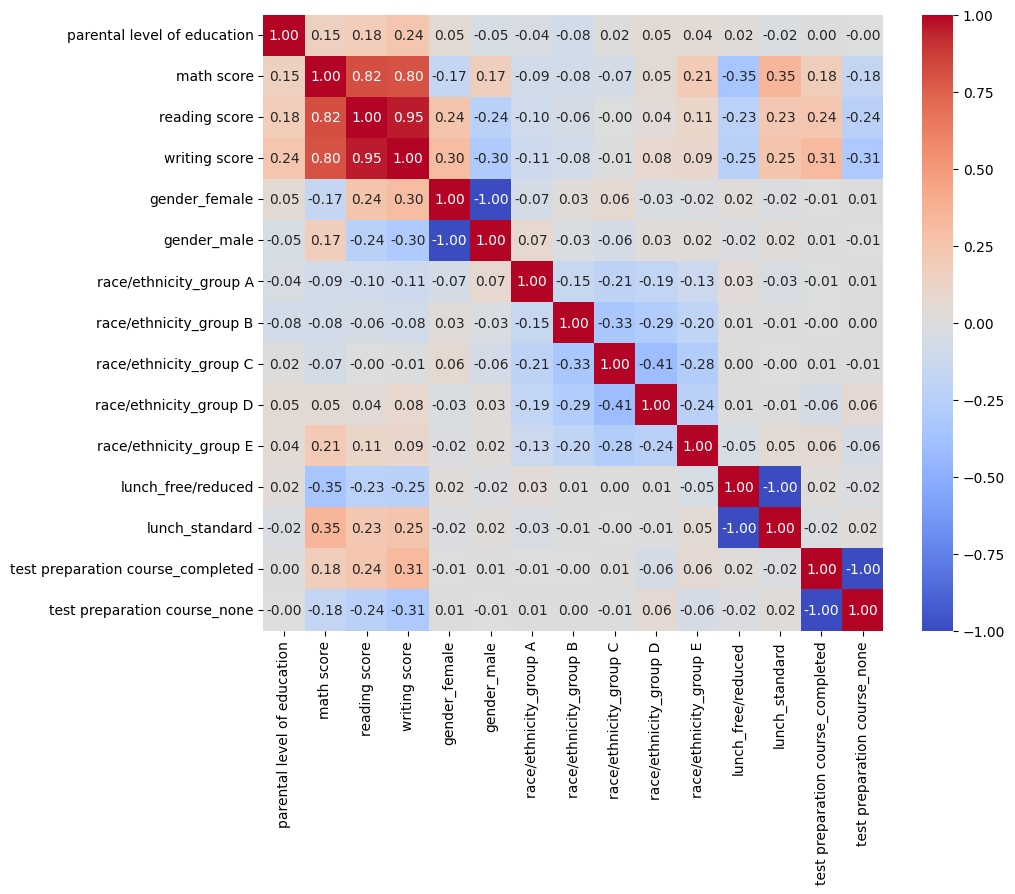

In [198]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [199]:
y=df_encoded['math score']
X=df_encoded.drop(columns=['math score'])

In [200]:
# Split the data into training and test sets (80/20).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [201]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

In [202]:
print("Scaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scaling features using StandardScaler...


In [203]:
# Trainer regression model on scaled features
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [204]:
# predicting on test data
y_pred = model.predict(X_test_scaled)

In [205]:
# R2 score on the test data
r2 = r2_score(y_test, y_pred)
print(f"R-square score on the test data: {r2:.2f}")

R-square score on the test data: 0.85


In [206]:
# RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 5.74


In [207]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

MAE: 4.4825


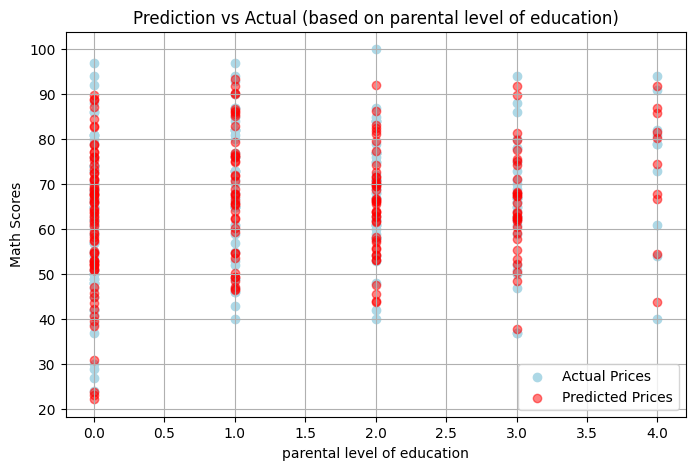

In [208]:
# Step 8: Plotting (visualizing prediction using one feature)
feature_index = 0  # parental level of education
X_plot = X_test.iloc[:, feature_index]
plt.figure(figsize=(8, 5))
plt.scatter(X_plot, y_test, color='lightblue', label='Actual Prices')
plt.scatter(X_plot, y_pred, color='red', alpha=0.5, label='Predicted Prices')
plt.xlabel(X_test.columns[feature_index])
plt.ylabel('Math Scores')
plt.title('Prediction vs Actual (based on parental level of education)')
plt.legend()
plt.grid(True)
plt.show()

#Part 2: Naive Bayes, KNN, and Decision Tree

## Data Preprocessing

In [209]:
# Load the dataset
df_naive = pd.read_csv('/content/drive/MyDrive/Atomcamp DS&AI Bootcamp 2025/Machine Learning/Social_Network_Ads.csv')
df_naive

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [210]:
# Drop the User ID column
df_naive = df_naive.drop(columns=['User ID'])
df_naive.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [211]:
df_naive.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [212]:
# Encode the Gender column using Label Encoding or One-Hot Encoding.
#encoding categorical columns using one hot encoder
df_encoded_naive = pd.get_dummies(df_naive, columns=['Gender', 'Purchased'])
df_encoded_naive.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased_0,Purchased_1
0,19,19000,False,True,True,False
1,35,20000,False,True,True,False
2,26,43000,True,False,True,False
3,27,57000,True,False,True,False
4,19,76000,False,True,True,False


In [213]:
for col in df_encoded_naive.columns:
  # print(f'{col}: {df[col].unique()}')
  print(f'{col} unique values: {df_encoded_naive[col].value_counts()}')

Age unique values: Age
35    32
37    20
26    16
42    16
41    16
39    15
40    15
48    14
47    14
27    13
38    13
36    12
46    12
28    12
30    11
31    11
49    10
29    10
32     9
24     9
33     9
60     7
45     7
19     7
59     7
20     7
25     6
52     6
58     6
23     6
34     6
18     5
22     5
57     5
53     5
21     4
54     4
50     4
55     3
51     3
56     3
43     3
44     2
Name: count, dtype: int64
EstimatedSalary unique values: EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
99000      1
129000     1
46000      1
64000      1
139000     1
Name: count, Length: 117, dtype: int64
Gender_Female unique values: Gender_Female
True     204
False    196
Name: count, dtype: int64
Gender_Male unique values: Gender_Male
False    204
True     196
Name: count, dtype: int64
Purchased_0 unique values: Purchased_0
True     257
False    143
Name: count, dtype: int64
Purchased_1 unique values: Purchased_1
False    257
True  

In [214]:
# Standardize the feature columns (Age, EstimatedSalary)
scaler_naive = StandardScaler()
df_encoded_naive[['Age', 'EstimatedSalary']] = scaler_naive.fit_transform(df_encoded_naive[['Age', 'EstimatedSalary']])

df_encoded_naive.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased_0,Purchased_1
0,-1.781797,-1.490046,False,True,True,False
1,-0.253587,-1.460681,False,True,True,False
2,-1.113206,-0.785290,True,False,True,False
3,-1.017692,-0.374182,True,False,True,False
4,-1.781797,0.183751,False,True,True,False



📈 Plotting histograms of all features...


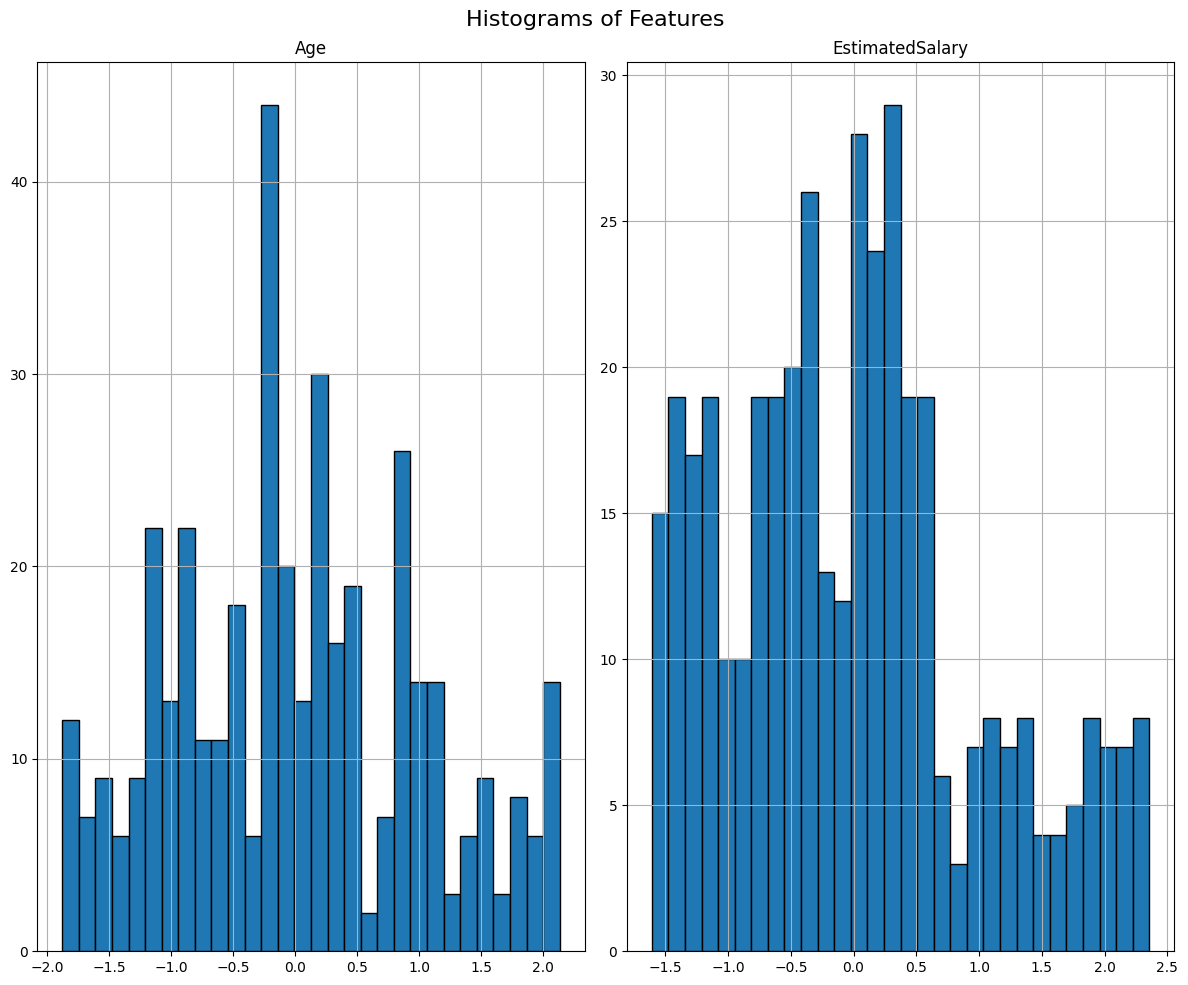

In [215]:
print("\n📈 Plotting histograms of all features...")
df_encoded_naive.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

## Model Building and Evaluation

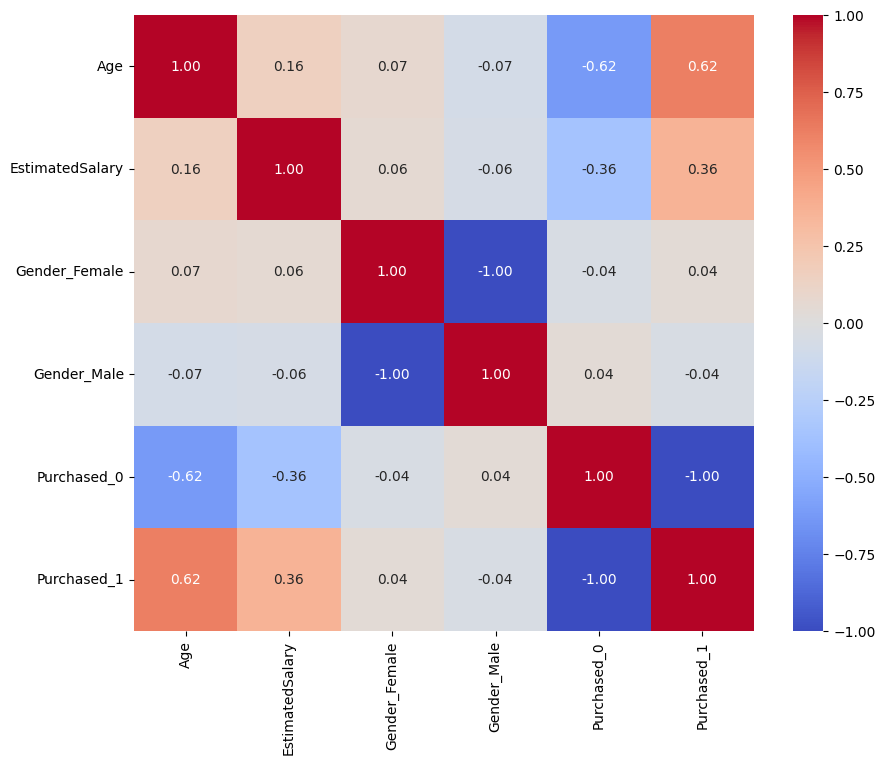

In [216]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded_naive.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [217]:
df_encoded_naive.columns

Index(['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male', 'Purchased_0',
       'Purchased_1'],
      dtype='object')

In [218]:
y=df_encoded_naive['Purchased_1']
X=df_encoded_naive.drop(columns=['Purchased_1', 'Purchased_0'])

In [219]:
# Split the dataset into training and test sets (75/25).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

### Gaussian Naive Bayes Model

In [220]:
from sklearn.naive_bayes import GaussianNB

In [221]:
# Training Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [222]:
# Make predictions
y_pred = model.predict(X_test)

In [223]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

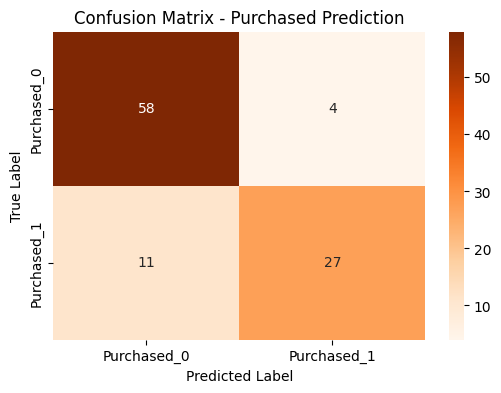

In [224]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased_0', 'Purchased_1'], yticklabels=['Purchased_0', 'Purchased_1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Purchased Prediction')
plt.show()

In [225]:
# Classification Report
print("Classification Report of Gaussian Naive Bayes model:")
print(classification_report(y_test, y_pred, target_names=['Purchased_0', 'Purchased_1']))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report of Gaussian Naive Bayes model:
              precision    recall  f1-score   support

 Purchased_0       0.84      0.94      0.89        62
 Purchased_1       0.87      0.71      0.78        38

    accuracy                           0.85       100
   macro avg       0.86      0.82      0.83       100
weighted avg       0.85      0.85      0.85       100

Accuracy: 0.85


### K-Nearest Neighbors model


In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### k=3

In [228]:
# Training K-Nearest Neighbors model
k = 3 #(testing with k=5)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [229]:
y_pred = knn.predict(X_test_scaled)

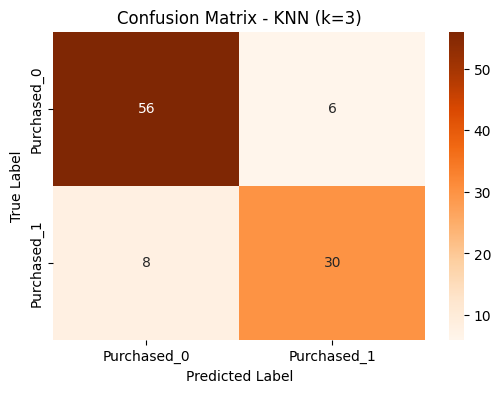

In [230]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased_0', 'Purchased_1'], yticklabels=['Purchased_0', 'Purchased_1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

In [231]:
# Classification Report
print("Classification Report of KNN where k=3:")
print(classification_report(y_test, y_pred, target_names=['Purchased_0', 'Purchased_1']))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report of KNN where k=3:
              precision    recall  f1-score   support

 Purchased_0       0.88      0.90      0.89        62
 Purchased_1       0.83      0.79      0.81        38

    accuracy                           0.86       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100

Accuracy: 0.86


#### k = 5

In [232]:
# Training K-Nearest Neighbors model
k = 5 #(testing with k=5)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [233]:
y_pred = knn.predict(X_test_scaled)

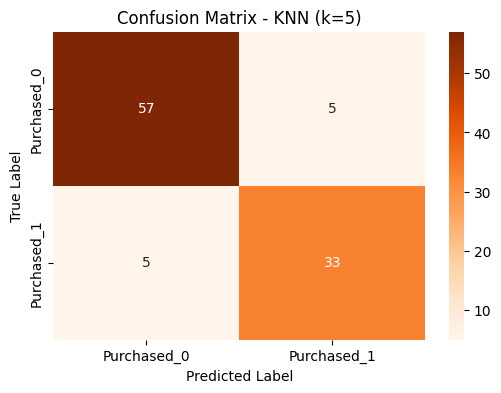

In [234]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased_0', 'Purchased_1'], yticklabels=['Purchased_0', 'Purchased_1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

In [235]:
# Classification Report
print("Classification Report of KNN where k=5:")
print(classification_report(y_test, y_pred, target_names=['Purchased_0', 'Purchased_1']))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report of KNN where k=5:
              precision    recall  f1-score   support

 Purchased_0       0.92      0.92      0.92        62
 Purchased_1       0.87      0.87      0.87        38

    accuracy                           0.90       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

Accuracy: 0.9


#### k = 7

In [236]:
# Training K-Nearest Neighbors model
k = 7 #(testing with k=5)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [237]:
y_pred = knn.predict(X_test_scaled)

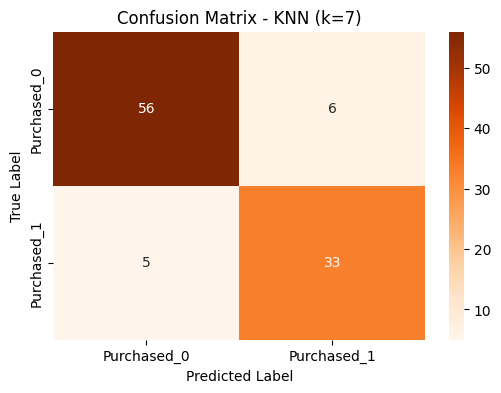

In [238]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Purchased_0', 'Purchased_1'], yticklabels=['Purchased_0', 'Purchased_1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - KNN (k={k})')
plt.show()

In [239]:
# Classification Report
print("Classification Report of KNN where k=7:")
print(classification_report(y_test, y_pred, target_names=['Purchased_0', 'Purchased_1']))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report of KNN where k=7:
              precision    recall  f1-score   support

 Purchased_0       0.92      0.90      0.91        62
 Purchased_1       0.85      0.87      0.86        38

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.89      0.89       100

Accuracy: 0.89


### Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [241]:
# Training decision tree
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [242]:
y_pred = dt_clf.predict(X_test_scaled)

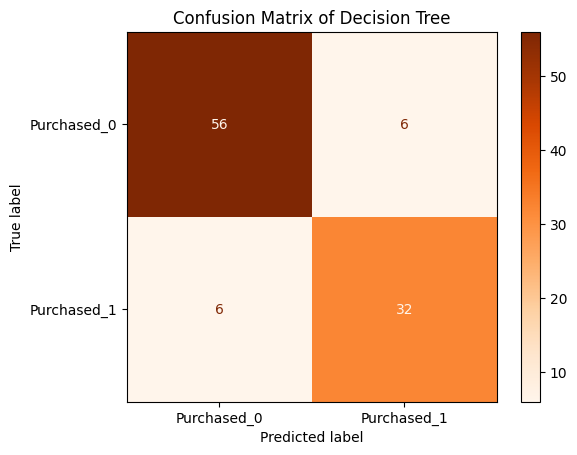

In [243]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Purchased_0', 'Purchased_1'])
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix of Decision Tree")
plt.show()

In [244]:
# Classification Report
print("Classification Report of Decision Tree:")
print(classification_report(y_test, y_pred, target_names=['Purchased_0', 'Purchased_1']))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report of Decision Tree:
              precision    recall  f1-score   support

 Purchased_0       0.90      0.90      0.90        62
 Purchased_1       0.84      0.84      0.84        38

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100

Accuracy: 0.88


**Summary Comparison:**

All three models (Gaussian Naive Bayes, KNN, and Decision Tree) demonstrate good performance on this dataset, achieving high accuracy scores and reasonable precision/recall for both classes. Some performance metrics might vary slightly between the models and different values of k for KNN. It's difficult to declare one model definitively superior. However, the results suggest that all three are suitable for this classification task. The choice of the best model might depend on different factors.